# <center>PROBLEM SORTOWAŃ - WSTĘP</center>

0. Notacja asymptotycza

Idea: chcemy określić zachowanie danej funkcji (która będzie określać ilosć potrzebnej pracy do wykonania algorytmu)
 - nie obchodzi nas zbytnio jak ta funkcja zachowuje się początkowo, lecz jak "koniec końców" będzie wyglądała
 - to co się dzieje dla małych danych nas nie interesuje
 - podobnie nie przejmujemy się stałymi

Weźmy funkcje $f$ i $g$:
 - $f: \N \rightarrow \N$
 - $g: \N \rightarrow \N$

Funkcja $g$ będzie funkcją wzorcową

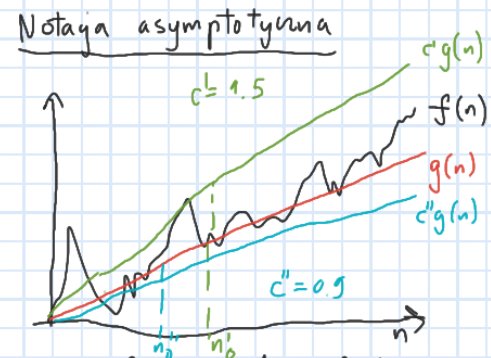

$def$. Mówimy, że funkcja $f$ jest $O(g(n))$ (asymptotycznie oszacowana z góry) jeśli:
 - $(\exists c > 0)(\exists n_0 \in \N)(\forall n \geq n_0)(f(n) \leq c \cdot g(n))$

np. dla stałej $c=1.5$, funkcja $f$ jest $O(g(n))$
 - czyli funkcja będzie rzędu $O(g(n))$, jeśli od pewnego momentu $n_0$, $\forall n$, funkcja $f$ nie będzie rosnąć szybciej od $g(n)$ z dokładnością do stałej
 - na rysunku $c'g(n)$

$def$. Mówimy, że funkcja $f$ jest $\Omega(g(n))$ (asymptotycznie oszacowana z dołu) jeśli:
 - $(\exists c > 0)(\exists n_0 \in \N)(\forall n \geq n_0)(f(n) \leq c \cdot g(n))$

np. dla stałej $c=0.9$, funkcja $f$ jest $\Omega(g(n))$
 - analogicznie co do oszacowania z góry: 
     - funkcja będzie rzędu $\Omega(g(n))$, jeśli od pewnego momentu $n_0$, $\forall n$, funkcja $f$ nie będzie rosnąć wolniej od $g(n)$ z dokładnością do stałej
 - na rysunku $c''g(n)$

$def$. Mówimy, że funkcja $f$ jest $\Theta(g(n))$ (jest dokładnie rzędu $g(n)$) jeśli:
 - jest $O(g(n))$ oraz $\Omega(g(n))$

Kilka przykładów:
 - $15n^3 + 7n^2$ jest $\Theta(n^3)$
 - $n^4$ jest $O(n^5)$
 - $20n^2+7$ jest $\Omega(n)$

Ostatnie dwa przykłady są przykładem oszacowania niedokładnego


1. Wstęp

Dany jest ciąg danych postaci: $A_n=a_0, a_1, ...,a_{n-1}$ z operatorem $\leq$

Problem: naszym wynikiem, będzie permutacja $A_n': \forall i \in \N: i \in [0,n-1): a_i<a_{i+1}$ 

Co oznacza, że chcemy posortować te dane, po jakiejś zmiennej.

$def.$ Sortowaniem stablinym nazywamy taką permutacje, w której zachowana jest kolejność elementów o tym samym kluczu.

Przykład: Dla ciągu krotek postaci: $(3,10), (1,2), (2,5), (1,4), (2,7)$:
 - sortowanie stabilne po pierwszym elemencie krotki zwróci wynik: </br>$(1,2), (1,4), (2,5), (2,7), (3,10)$
 - sortowanie niestabilne mogłoby zwrócić inną permutacje, ale też poprawną w stosunku do naszych kryteriów: </br>np. $ (1,4), (1,2), (2,7), (2,5), (3,10)$

Reprezentacja danych:
 - tablica
 - lsita (jednokierunkowa, dwukierunkowa)
 - plik

2. Algorytmy sortujące

Algorytmy sortujące możemy podzielić na:
 - proste: $O(n^2)$
 - szybkie: $O(nlogn)$

3. Sortowanie przez scalanie (mergesort).

Idea:
 - chcemy podzielić tablicę danych na dwie części i sortować osobno każdą część rekurencyjnie, a następnie scalić oba fragmenty w posortowaną tablicę </br>

 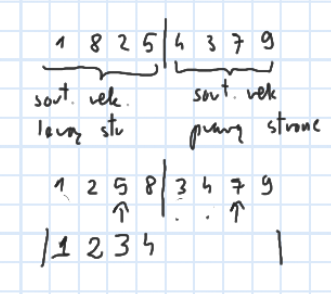

Złożoność czasowa:

Rozrysujmy drzewo wywołań rekurencyjnych:
 - gdzie $cn$ to praca, która musi zostać wykonana na posortowanie danego fragmentu tablicy - w drugim wywołaniu potrzeba już $\frac{cn}{2}$ operacji

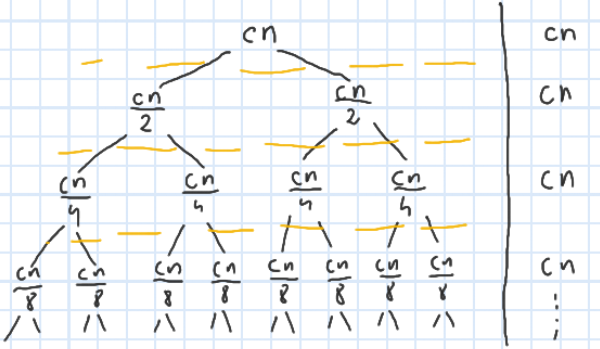

Obserwacje:
 - na każdy poziom rekurencji potrzeba $cn$ pracy
 - poziomów rekurencji jest $\approx logn$
 - dla $logn$ poziomu rekursji, rozmiar danych będzie wynosił $\frac{n}{2^{logn}} = \frac{n}{n} = 1$  

Otrzymujemy zatem złożoność: $T(n)\approx(cnlogn)$
 - mamy $logn$ poziomów rekurencji, a dla każdego poziomu należy wykonać $cn$ pracy

Asymptotycznie możemy to ograniczyć jako: $O(nlogn)$ 

Sortowanie przez scalanie jest sortowaniem stabilnym.

In [8]:
# implemetcja pochodzi z geeks4geeks

def merge_sort(arr):
    if len(arr) > 1:
 
        # szukamy środka, gdzie podzielić na pół
        mid = len(arr)//2
 
        # podział tablicy
        L = arr[:mid]

        R = arr[mid:]
 
        # sortowanie lewej części
        merge_sort(L)
 
        # sortowanie prawej części
        merge_sort(R)
 
        i = j = k = 0
 
        # Kopiowanie danych
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Sprawdzenie czy nie pominęliśmy danego elementu: np. przy nieparzystej ilości elementów: podział nie będzie idealny
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

A1=[1,2,5,6,4,3,2,1,24,2,6,7,4,3,221,7]

A2=[2,1,3,7]

def check(A):
    print("input array: ",end='')
    print(*A)
    merge_sort(A)
    print("output array: ",end='')
    print(*A)
    print()
    
check(A1)
check(A2)
    

input array: 1 2 5 6 4 3 2 1 24 2 6 7 4 3 221 7
output array: 1 1 2 2 2 3 3 4 4 5 6 6 7 7 24 221

input array: 2 1 3 7
output array: 1 2 3 7



4. Sortowanie kopcowe (heapsort)

$def$. Kopiec - drzewo binarne, w którym każdy węzeł wewnetrzny przechowuje wartośći większą lub równą niż jego dzieci

Idea:
 - chcemy korzystać z własności kopca, aby po kolei wyciągać największy element w tablicy, aby zapisać go na końcu tablicy, a następnie będziemy naprawiać kopiec, do momentu wyczerpania danych w kopcu

Przykład:

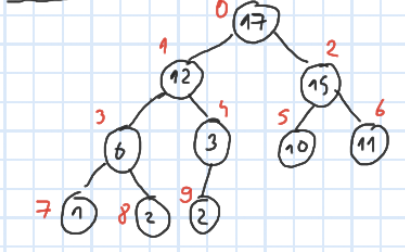

Reprezentacja w tablicy:

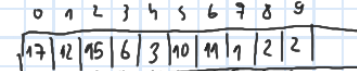

Aby jako rodzić mieć wygodny dostęp do dzieci, a jako dziecko do swojego rodzica, można zdefiniować bardzo przyjemne funkcje:
 - right - zwraca prawe dziecko
 - left - zwraca lewe dziecko
 - parent - zwraca rodzica

W celu naprawy kopca, po wyciągnięciu elementu, definiujemy funkcję heapify:
 - chcemy przywrócić własność przy założeniu, że jest popsuty tylko na szczycie
 - definiujemy $l$ i $r$ jako odpowiednio lewe i prawe dziecko
 - szukamy, który element należy zamienić (max_ind - indeks maksymalnego elementu)
 - jeśli faktycznie kopiec nie jest popsuty, to zamieniamy element z dzieckiem i wywołujemy funkcję z indeksem tego dziecka, czyli rekurencyjnie schodzimy w dół kopca zamieniając elementy (o ile jest taka potrzeba)

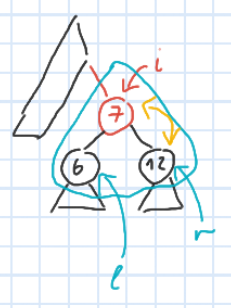

Zaczynając algorytm chcemy zdbudwać cały kopiec (aby na nim pracować), przyda się do tego funkcja build_heap:
 - zaczynamy od końca tablicy (czyli ustalamy go jako pierwszy węzeł) i wywołujemy w pętli funkcję heapify, aby doklejać po kolei fragmenty kopca

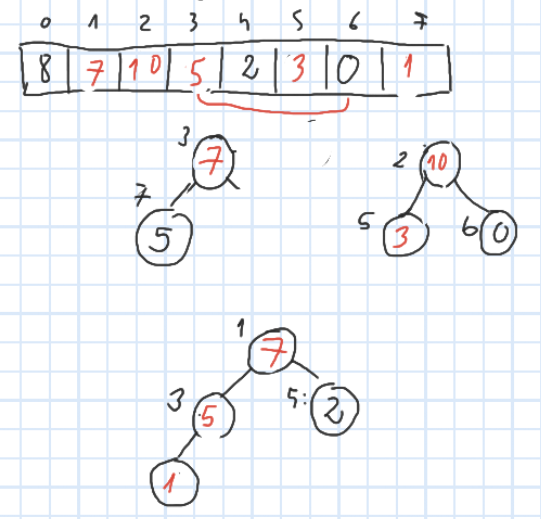


Obserwacje:
 - wysokość kopca wynosi $h=logn$
 - liczba elementów o wysokości $h$: $\lceil \frac{n}{2^{h+1}} \rceil$

Szacowanie kosztu obliczeniowego build_heap:
 - chcemy oszacować z góry tę procedurę
 - dla każdego poziomu drzewa, wykonujemy $\approx h$ operacji:
 - $O(\sum_{h=0}^{\lfloor logn \rfloor} [\lceil \frac{n}{2^{h+1}} \rceil] \cdot h)$
 - możemy pominąć sufit:
 - $= O(\sum_{h=0}^{\lfloor logn \rfloor} \frac{nh}{2^{h+1}} )$
 - możemy wyciągnąć $n$ przed sumę oraz wprowadzić, że $logn$, będzie duże:
 - $= O(n\sum_{h=0}^{\infty} \frac{h}{2^{h+1}})$
 - możemy oszacować (z góry) ten szereg przez funkcję tworzącą $f(x)=\frac{x}{(1-x)^2}$
 - dla $x=\frac{1}{2}$ otrzymamy $\sum_{h=0}^{\infty} \frac{h}{2^{h}} = \frac{\frac{1}{2}}{(1-\frac{1}{2})^2} = 2$
 - zatem złożoność build_heap to $O(n)$

Złożoność algorytmu: $O(nlogn)$

Sortowanie kopcowe jest sortowaniem stabilnym.


In [10]:
# implementacja z wykładu

def right(i): return 2*i+2
def left(i): return 2*i+1
def parent(i): return (i-1)//2


def heapify(A, i, n):
    l = left(i)
    r = right(i)
    max_ind = i

    if l < n and A[l] > A[max_ind]:
        max_ind = l
    if r < n and A[r] > A[max_ind]:
        max_ind = r

    if max_ind != i:
        A[i], A[max_ind] = A[max_ind], A[i]
        heapify(A, max_ind, n)


def build_heap(A):
    n = len(A)
    for i in range(parent(n-1), -1, -1):
        heapify(A, i, n)


def heap_sort(A):
    n = len(A)
    build_heap(A)
    for i in range(n-1, 0, -1):
        A[0], A[i] = A[i], A[0]
        heapify(A, 0, i)

A1=[1,2,5,6,4,3,2,1,24,2,6,7,4,3,221,7]

A2=[2,1,3,7]

def check(A):
    print("input array: ",end='')
    print(*A)
    heap_sort(A)
    print("output array: ",end='')
    print(*A)
    print()
    
check(A1)
check(A2)

input array: 1 2 5 6 4 3 2 1 24 2 6 7 4 3 221 7
output array: 1 1 2 2 2 3 3 4 4 5 6 6 7 7 24 221

input array: 2 1 3 7
output array: 1 2 3 7

